## Import Data


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import pandas as pd
data = pd.read_csv('device2_air_quality_2024-09-25_to_2025-04-07.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52259 entries, 0 to 52258
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        52259 non-null  object 
 1   deviceId         52259 non-null  int64  
 2   payload_id       52259 non-null  int64  
 3   air_temperature  52259 non-null  float64
 4   humidity         52259 non-null  float64
 5   CO2              52259 non-null  int64  
 6   pm1              52259 non-null  float64
 7   pm10             52259 non-null  float64
 8   pm2_5            52259 non-null  float64
 9   air_pressure     52259 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 4.0+ MB


In [29]:
data = data.drop(columns = ['Timestamp','deviceId','payload_id'])
data

,air_temperature,humidity,CO2,pm1,pm10,pm2_5,air_pressure
0,26.30,64.26,455,61.5,119.9,111.1,100994
1,26.29,64.29,452,60.2,119.8,111.0,100995
2,26.30,64.32,442,63.1,125.5,114.3,100998
3,26.29,64.34,442,62.1,123.0,112.9,100998
4,26.29,64.44,437,62.7,124.2,114.4,101000
...,...,...,...,...,...,...,...
52254,27.02,62.91,1263,10.0,16.1,14.7,99929
52255,27.04,64.83,1108,11.2,17.5,16.6,99937
52256,27.05,66.95,1030,12.4,18.6,17.9,99941
52257,27.06,68.70,948,13.6,20.8,20.0,99943


In [30]:
data.isnull().sum()

air_temperature    0
humidity           0
CO2                0
pm1                0
pm10               0
pm2_5              0
air_pressure       0
dtype: int64

In [31]:
data.isna().sum()

air_temperature    0
humidity           0
CO2                0
pm1                0
pm10               0
pm2_5              0
air_pressure       0
dtype: int64

In [32]:
data.duplicated().sum()

375

In [33]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [34]:
data.describe(

)

,air_temperature,humidity,CO2,pm1,pm10,pm2_5,air_pressure
count,51884.000000,51884.000000,51884.000000,51884.000000,51884.000000,51884.000000,51884.000000
mean,27.576955,57.505412,735.739399,48.042009,92.502348,81.903136,100693.903149
std,4.075023,14.322546,549.448357,27.917789,57.846034,53.680096,562.638999
min,19.280000,26.910000,247.000000,3.500000,4.800000,4.800000,98550.000000
25%,24.360000,44.440000,432.000000,28.400000,55.100000,44.400000,100290.000000
50%,27.390000,59.820000,468.000000,39.000000,74.000000,64.000000,100712.000000
75%,30.490000,69.230000,775.000000,63.300000,117.900000,107.800000,101167.000000
max,37.960000,85.950000,4347.000000,287.400000,768.000000,706.900000,101866.000000


In [35]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 10044


In [36]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

Removing 10044 potential outliers.
Removing 7749 potential outliers.
Removing 5662 potential outliers.
Removing 2771 potential outliers.
Removing 1353 potential outliers.
Removing 826 potential outliers.
Removing 275 potential outliers.
Removing 124 potential outliers.
Removing 70 potential outliers.
Removing 61 potential outliers.
Removing 26 potential outliers.
Removing 1 potential outliers.
No more outliers detected.
Number of rows after removing outliers iteratively: 22922


,air_temperature,humidity,CO2,pm1,pm10,pm2_5,air_pressure
1298,24.49,56.46,441,51.7,85.5,81.0,101232
1299,23.91,55.12,436,51.5,84.2,80.2,101239
1300,23.85,57.89,436,51.0,83.7,79.4,101244
1301,24.09,58.78,463,50.3,82.7,78.0,101257
1511,25.22,55.54,508,57.6,102.1,95.1,100971


In [37]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22922 entries, 1298 to 52157
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   air_temperature  22922 non-null  float64
 1   humidity         22922 non-null  float64
 2   CO2              22922 non-null  int64  
 3   pm1              22922 non-null  float64
 4   pm10             22922 non-null  float64
 5   pm2_5            22922 non-null  float64
 6   air_pressure     22922 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.4 MB


In [ ]:
# from sklearn.preprocessing import StandardScaler

# # Dataframe kamu: data_cleaned
# features = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO2 (ppm)", "Temperature (Celsius)", "Temperature (Fahrenheit)", "Humidity (%)"]


<Axes: >

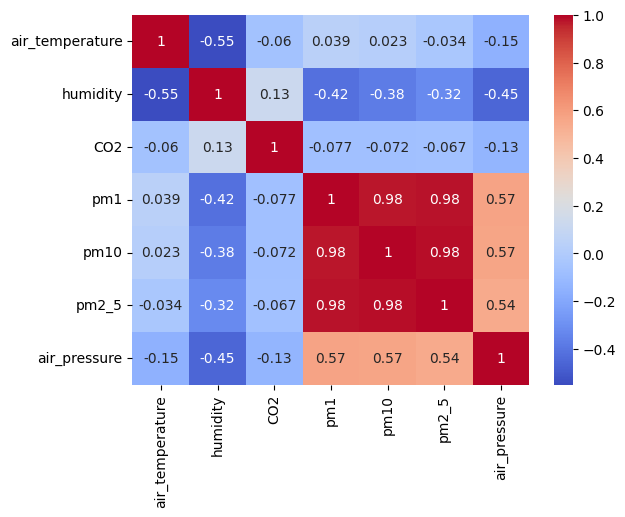

In [38]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [39]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:02<00:23,  2.99s/it]

k=2, Silhouette Score=0.2912


Clustering progress:  22%|██▏       | 2/9 [00:05<00:20,  2.94s/it]

k=3, Silhouette Score=0.3152


Clustering progress:  33%|███▎      | 3/9 [00:08<00:17,  2.85s/it]

k=4, Silhouette Score=0.2688


Clustering progress:  44%|████▍     | 4/9 [00:11<00:14,  2.92s/it]

k=5, Silhouette Score=0.2869


Clustering progress:  56%|█████▌    | 5/9 [00:14<00:12,  3.02s/it]

k=6, Silhouette Score=0.2906


Clustering progress:  67%|██████▋   | 6/9 [00:17<00:08,  2.96s/it]

k=7, Silhouette Score=0.2792


Clustering progress:  78%|███████▊  | 7/9 [00:20<00:05,  2.84s/it]

k=8, Silhouette Score=0.2781


Clustering progress:  89%|████████▉ | 8/9 [00:23<00:02,  2.89s/it]

k=9, Silhouette Score=0.2741


Clustering progress: 100%|██████████| 9/9 [00:26<00:00,  2.92s/it]

k=10, Silhouette Score=0.2695


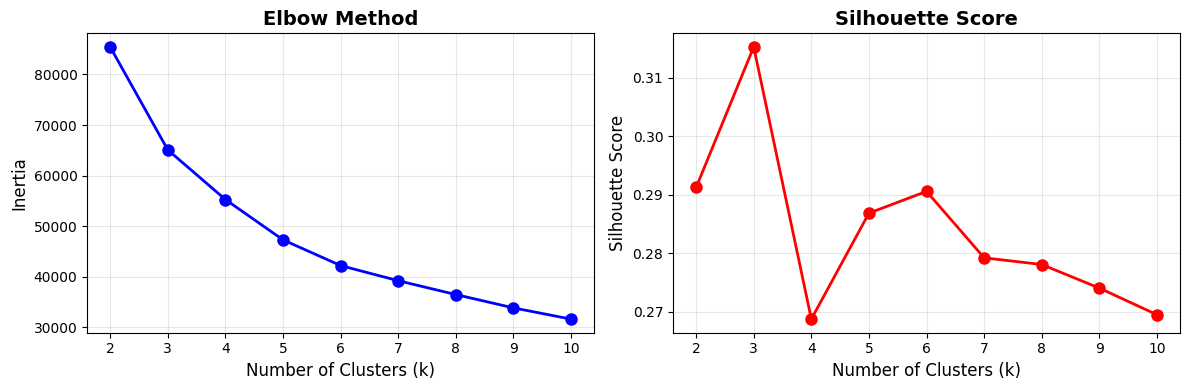

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [44]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=3, n_init=10, random_state=42)

In [45]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

         air_temperature   humidity         CO2        pm1       pm10  \
Cluster                                                                 
0              33.755936  42.516589  436.743020  36.541796  67.539298   
1              28.507801  73.385616  445.164095  27.201979  52.367841   
2              27.464733  54.604093  436.984958  50.872280  90.575772   

             pm2_5   air_pressure  
Cluster                            
0        56.523053  100513.473959  
1        44.058523  100203.132996  
2        83.047086  100942.628794  


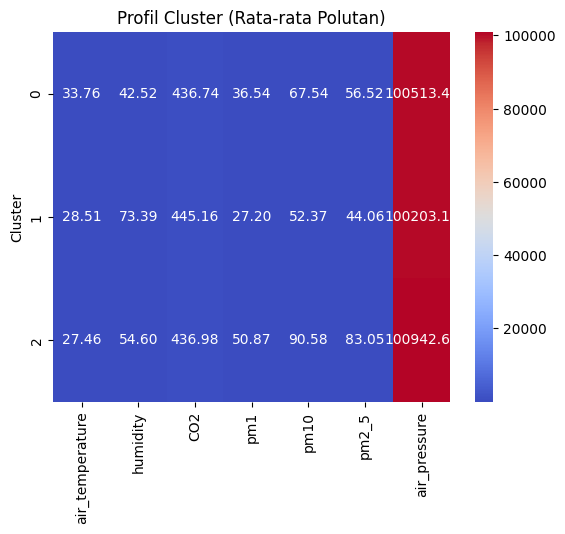

In [46]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [47]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
1    8489
0    6125
2    3723
Name: count, dtype: int64


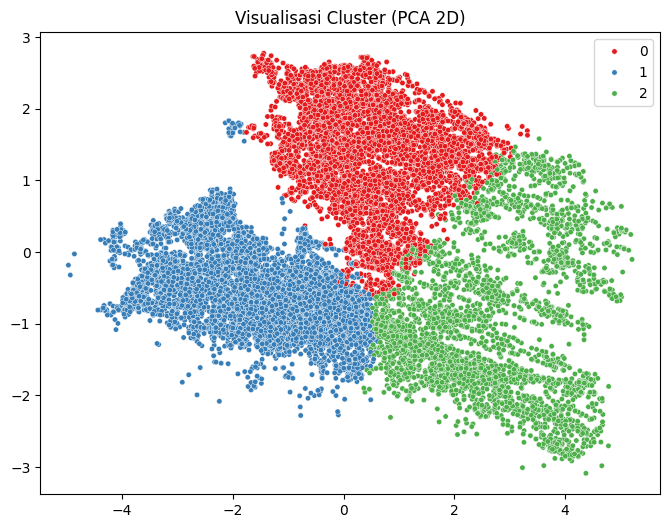

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.315234656865243
Davies-Bouldin Index: 1.2375679572751508


In [50]:
# Gabungkan kembali train dan test yang sudah di-scale
import numpy as np

X_final = np.vstack([X_train_scaled, X_test_scaled])  # Gabung array
y_final = np.hstack([train_clusters, test_clusters])   # Gabung label cluster

In [51]:

# === 3. Siapkan data untuk klasifikasi ===

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)



=== Random Forest ===
Accuracy: 0.9969465648854962
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1524
           1       1.00      1.00      1.00      2136
           2       1.00      0.99      0.99       925

    accuracy                           1.00      4585
   macro avg       1.00      1.00      1.00      4585
weighted avg       1.00      1.00      1.00      4585



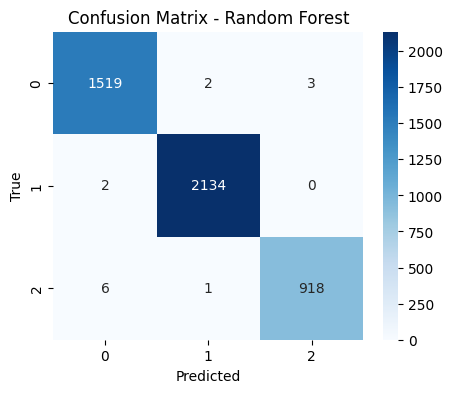


=== SVM ===
Accuracy: 0.9943293347873501
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1524
           1       1.00      1.00      1.00      2136
           2       0.99      0.98      0.99       925

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



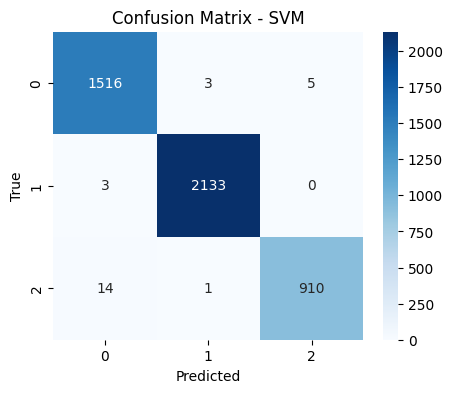


=== KNN ===
Accuracy: 0.9934569247546347
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1524
           1       1.00      1.00      1.00      2136
           2       0.99      0.98      0.99       925

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



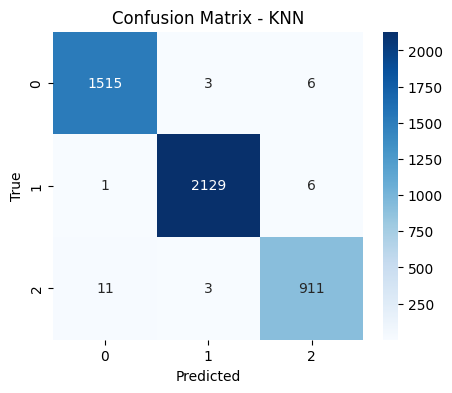


=== Naive Bayes ===
Accuracy: 0.9631406761177753
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1524
           1       0.98      0.97      0.98      2136
           2       0.94      0.97      0.95       925

    accuracy                           0.96      4585
   macro avg       0.96      0.96      0.96      4585
weighted avg       0.96      0.96      0.96      4585



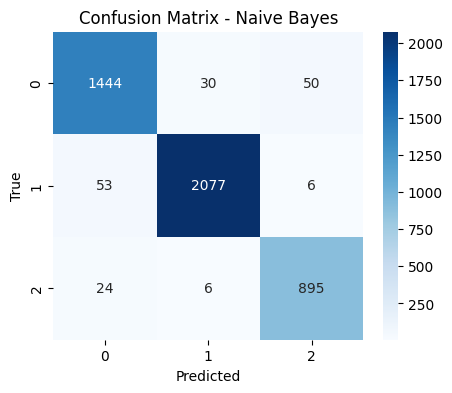


=== Decition Tree ===
Accuracy: 0.9928026172300981
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1524
           1       1.00      1.00      1.00      2136
           2       0.99      0.99      0.99       925

    accuracy                           0.99      4585
   macro avg       0.99      0.99      0.99      4585
weighted avg       0.99      0.99      0.99      4585



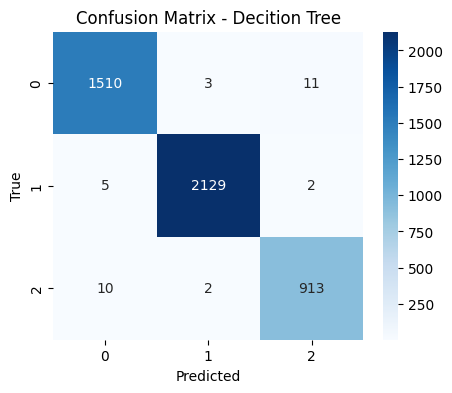

In [52]:
from sklearn.tree import DecisionTreeClassifier
# === 4. Definisi model ===
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decition Tree": DecisionTreeClassifier(random_state=42),
}

# === 5. Training & Evaluasi ===
for name, model in models.items():
    model.fit(X_train_cls, y_train_cls)
    y_pred = model.predict(X_test_cls)
    
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test_cls, y_pred))
    print(classification_report(y_test_cls, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()